In [2]:
import pandas as pd 
import numpy as np
import nltk
from tensorflow.keras.utils import pad_sequences
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from tensorflow.keras.layers import Embedding , LSTM , Dense , SimpleRNN , Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import string
from textblob import TextBlob
import joblib

In [3]:
len(open("data/train.txt","r").readlines())

16000

In [4]:
len(open("data/test.txt","r").readlines())

2000

In [5]:
open("data/val.txt","r").readlines()[0]

'im feeling quite sad and sorry for myself but ill snap out of it soon;sadness\n'

In [6]:
## reading the data from the text files
train = open("data/train.txt","r").readlines()
test = open("data/test.txt","r").readlines()
val = open("data/val.txt","r").readlines()

In [7]:
full_data = train + test + val
len(full_data)

20000

In [8]:
## creating independent and dependent variables
x = []
y = []
for item in full_data:
    text , label = item.split(";")
    label = label.replace("\n","")
    x.append(text)
    y.append(label)

In [9]:
## text cleaning steps
# 1 - doing loweercase
# 2 - perform tokenization
# 3 - remove stop words
# 4 - perform stemming or lemma
# then wee will get clean data


def text_cleaning(sentences):
    clean_text = []
    for sent in sentences:
        sent = sent.lower()
        sent = nltk.word_tokenize(sent)
        sent = [word for word in sent if word not in stopwords.words("english")]
        ps = PorterStemmer()
        sent = [ps.stem(word) for word in sent]
        clean_text.append(" ".join(sent))
    return clean_text

In [10]:
cleaned_data = text_cleaning(x)

In [11]:
x[0]

'i didnt feel humiliated'

In [12]:
cleaned_data[0]

'didnt feel humili'

In [13]:
## tokenization 
tokenizer = Tokenizer(
    oov_token = "<nothing>"
)
tokenizer.fit_on_texts(cleaned_data)

In [14]:
tokenizer.word_index
joblib.dump(tokenizer.word_index,"tokenizer.lb")

['tokenizer.lb']

In [15]:
## to check the no of counts of words in tokenizer
tokenizer.word_counts

OrderedDict([('didnt', 334),
             ('feel', 21204),
             ('humili', 69),
             ('go', 1101),
             ('hopeless', 81),
             ('damn', 54),
             ('hope', 320),
             ('around', 382),
             ('someon', 335),
             ('care', 254),
             ('awak', 22),
             ('im', 3055),
             ('grab', 22),
             ('minut', 79),
             ('post', 234),
             ('greedi', 79),
             ('wrong', 152),
             ('ever', 260),
             ('nostalg', 63),
             ('fireplac', 3),
             ('know', 1192),
             ('still', 743),
             ('properti', 5),
             ('grouchi', 35),
             ('ive', 723),
             ('littl', 932),
             ('burden', 95),
             ('late', 167),
             ('wasnt', 119),
             ('sure', 310),
             ('take', 403),
             ('milligram', 1),
             ('time', 1215),
             ('recommend', 19),
             ('amoun

In [16]:
## to check the total no of sent 
tokenizer.document_count

20000

In [17]:
## tokenize the input sent as the seq
sequences = tokenizer.texts_to_sequences(cleaned_data)
sequences[0:5]

[[61, 2, 522],
 [10, 2, 419, 682, 67, 50, 60, 96, 1229],
 [4, 1230, 431, 107, 2, 432, 192],
 [92, 2, 592, 3696, 7, 21, 2844],
 [2, 918]]

In [18]:
## to equalise the lenghs of the input 
sequences = pad_sequences(sequences, maxlen=35,padding="post")
sequences[0:3]

array([[  61,    2,  522,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  10,    2,  419,  682,   67,   50,   60,   96, 1229,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   4, 1230,  431,  107,    2,  432,  192,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0]])

In [19]:
## to check the unique labels and no of class 
unique_label = list(pd.Series(np.array(y)).unique())
no_of_class = len(unique_label)
unique_label , no_of_class

(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'], 6)

In [20]:
## label encoding 
label_dist ={
    'sadness':0 , 'anger':1,'love':2,'surprise':3,'fear':4,'joy':5
}
def label_encoder(labels):
    label = []
    for lab in labels:
        label.append(label_dist[lab])
    label = np.array(label)
    return label


In [21]:
label = label_encoder(y)
label[0:5]

array([0, 0, 1, 2, 1])

In [22]:
## Splittng the data into train and test 

X_train,X_test,y_train,y_test =train_test_split(sequences,label,test_size=0.2,random_state=42)



In [23]:
model = Sequential()
model.add(SimpleRNN(32,input_shape = (35,1),return_sequences=False))
model.add(Dense(no_of_class, activation="softmax"))

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.summary()

C:\Users\verma\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,286 (5.02 KB)

 Trainable params: 1,286 (5.02 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train, y_train,epochs=5,batch_size=32)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3212 - loss: 1.5980
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3399 - loss: 1.5762
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3354 - loss: 1.5779
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3425 - loss: 1.5719
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3399 - loss: 1.5702


In [25]:
## expanding the dimensions 
np.expand_dims(sequences[0], axis=0)

array([[ 61,   2, 522,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [26]:
pred = model.predict(np.expand_dims(sequences[0], axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


array([[0.2862269 , 0.15559924, 0.0825639 , 0.0353454 , 0.10735744,
        0.33290717]], dtype=float32)

In [27]:
unique_label[np.argmax(pred)], unique_label[label[5]]

('joy', 'sadness')

In [28]:
## Lstm model defining 
model = Sequential([
    LSTM(64, input_shape=(35,1),return_sequences=True),
    LSTM(64,),
    Dense(units=6,activation="softmax"),
])

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 35, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,310 (196.52 KB)

 Trainable params: 50,310 (196.52 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(X_train,y_train,epochs=25)

Epoch 1/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3298 - loss: 1.6006
Epoch 2/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.3388 - loss: 1.5736
Epoch 3/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.3390 - loss: 1.5732
Epoch 4/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.3382 - loss: 1.5739
Epoch 5/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.3496 - loss: 1.5673
Epoch 6/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.3399 - loss: 1.5688
Epoch 7/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.3444 - loss: 1.5685
Epoch 8/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.3469 - loss: 1.5583
Epoch 9/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.3402 - loss: 1.5751
Epoch 10/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.3542 - loss: 1.5651
Epoch 11/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.3491 - loss: 1.5598
Epoch 12/25
500/500 ━━━━━━━━━━━━━━━━━━━━

<Axes: >

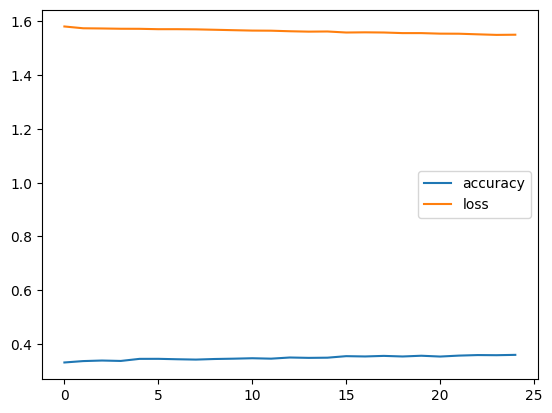

In [30]:
pd.DataFrame(model.history.history).plot()

In [31]:
## predictionm with lstm
prediction  = model.predict(X_test)
prediction

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


array([[0.25982383, 0.13687989, 0.07910519, 0.02746292, 0.1170846 ,
        0.3796436 ],
       [0.2954768 , 0.14345516, 0.06810385, 0.02586235, 0.13463569,
        0.3324661 ],
       [0.2795941 , 0.13558246, 0.06871957, 0.02929952, 0.12059791,
        0.36620647],
       ...,
       [0.38190755, 0.11986972, 0.04794833, 0.02638397, 0.17137472,
        0.25251567],
       [0.2811061 , 0.13772608, 0.08435936, 0.03360911, 0.12981525,
        0.33338413],
       [0.32266015, 0.13460314, 0.0582912 , 0.02772616, 0.13995947,
        0.3167599 ]], dtype=float32)